<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#🛒-Market-Basket-Analysis" data-toc-modified-id="🛒-Market-Basket-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>🛒 Market Basket Analysis</a></span><ul class="toc-item"><li><span><a href="#Association-Rules" data-toc-modified-id="Association-Rules-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Association Rules</a></span></li></ul></li><li><span><a href="#Datasets" data-toc-modified-id="Datasets-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Datasets</a></span></li><li><span><a href="#🥐-Our-Little-Bakery-at-the-Train-Station-🥯" data-toc-modified-id="🥐-Our-Little-Bakery-at-the-Train-Station-🥯-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>🥐 Our Little Bakery at the Train Station 🥯</a></span></li><li><span><a href="#Generating-Simple-Association-Rules" data-toc-modified-id="Generating-Simple-Association-Rules-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Generating Simple Association Rules</a></span></li><li><span><a href="#Metrics-:-Selecting-Useful-Association-Rules" data-toc-modified-id="Metrics-:-Selecting-Useful-Association-Rules-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Metrics : Selecting Useful Association Rules</a></span><ul class="toc-item"><li><span><a href="#Support" data-toc-modified-id="Support-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Support</a></span></li><li><span><a href="#Confidence" data-toc-modified-id="Confidence-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Confidence</a></span></li><li><span><a href="#Lift" data-toc-modified-id="Lift-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Lift</a></span></li><li><span><a href="#Leverage" data-toc-modified-id="Leverage-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Leverage</a></span></li><li><span><a href="#Conviction" data-toc-modified-id="Conviction-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Conviction</a></span></li><li><span><a href="#Zhang's-Metric-:-Association-and-Dissociation" data-toc-modified-id="Zhang's-Metric-:-Association-and-Dissociation-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Zhang's Metric : Association and Dissociation</a></span></li><li><span><a href="#Using-Multiple-Metrics" data-toc-modified-id="Using-Multiple-Metrics-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Using Multiple Metrics</a></span></li></ul></li><li><span><a href="#Dealing-with-Larger-Transactional-Datasets" data-toc-modified-id="Dealing-with-Larger-Transactional-Datasets-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Dealing with Larger Transactional Datasets</a></span><ul class="toc-item"><li><span><a href="#The-Apriori-Algorithm" data-toc-modified-id="The-Apriori-Algorithm-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>The Apriori Algorithm</a></span><ul class="toc-item"><li><span><a href="#🛍️-Use-Case-1---Bundle" data-toc-modified-id="🛍️-Use-Case-1---Bundle-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>🛍️ Use Case 1 - Bundle</a></span></li><li><span><a href="#🛍️-Use-Case-2:-Cross-promotion" data-toc-modified-id="🛍️-Use-Case-2:-Cross-promotion-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>🛍️ Use Case 2: Cross-promotion</a></span></li><li><span><a href="#🛍️-Use-Case-3---Cross-promotion-to-Sell-a-Target-Consequent" data-toc-modified-id="🛍️-Use-Case-3---Cross-promotion-to-Sell-a-Target-Consequent-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>🛍️ Use Case 3 - Cross-promotion to Sell a Target Consequent</a></span></li></ul></li><li><span><a href="#Another-Way-to-Simplify-MBA:-Aggregation" data-toc-modified-id="Another-Way-to-Simplify-MBA:-Aggregation-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Another Way to Simplify MBA: Aggregation</a></span><ul class="toc-item"><li><span><a href="#🛍️-Use-case-4:-Using-Aggregation-and-Zhang's-metric-to-select-the-layout-for-a-new-store." data-toc-modified-id="🛍️-Use-case-4:-Using-Aggregation-and-Zhang's-metric-to-select-the-layout-for-a-new-store.-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>🛍️ Use case 4: Using Aggregation and Zhang's metric to select the layout for a new store.</a></span></li></ul></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

# pd.set_option('display.max_rows', None)

#Import permutations from the itertools module
from itertools import permutations

#visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

# MBA packages

# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder
# Import Apriori algorithm
from mlxtend.frequent_patterns import apriori
# Import the association rule function from mlxtend
from mlxtend.frequent_patterns import association_rules




In this notebook we start a series of tutorials introducing techniques that will help you making better data-driven marketing decisions.

In this first Marketing Analytics tutorial, we introduce you to **Market Basket Analysis**.

This tutorial is based on Python. In good part of it we make use of package [`mlxtend`](http://rasbt.github.io/mlxtend/) which is very useful for performing important tasks for Market Basket Analysis such as:

1. Pre-process data
2. Generate item sets and rules
3. Filter according to metrics

After completing this tutorial, you'll know:

- What `Market Basket Analysis` is
- How to prepare your data to apply it
- The metrics used in MBA
- Perform MBA using the Apriori algorithm
- Some simple visualizations used in MBA


# 🛒 Market Basket Analysis

Good news! If you keep record of the business' transactions you can take advantage of **Market Basket Analysis (MBA)**! 

But what is Market Basket Analysis?

Market Basket Analysis is a powerful tool for translating vast amounts of customer transactions and viewing data into simple rules for product promotion and recommendation. It allows us, for instances, identifying products that are frequently bought together and from there building recommendations based on this information (e.g., bundles to offer, which items to present close to each other, how to improve inventory management, which items to upsell).

Market Basket Analysis is also a tool that helps people saving time and having fun. Yes! You read it right. This tool can also be used to build recommendation engines such as the ones used by Netflix and Spotify.

## Association Rules

MBA is based on the so called `association rules`. Association rules show us items that are associated with each other. For example, if we find out that buying croissant is associated with buying jam, then we state it as the following association rule:  
$$\{croissant\} \rightarrow \{jam\}$$

and we read it as "If croissant then jam".

In general, we have 

$$\{antecedent\} \rightarrow \{consequent\}$$

A simple way to start Market Basket Analysis is by generating and analyzing simple association rules with one `antecedent` and one `consequent`. Further, we can consider both multiple antecedents and/or consequents. For instances, we can generate more complicated rules such as:

$$\{croissant, coffee\} \rightarrow \{jam\}$$

$$\{wine\} \rightarrow \{baguette, cheese\}$$

Even if we use only simple rules (2 items) the number of association rules can be enormous. In addition, not all generated rules are useful. Bellow you can have an idea of the how the number of simple association rules grows with the number of items considered.


In [2]:
number_of_items = np.arange(1, 1000)
number_of_simple_rules = number_of_items*(number_of_items-1)

df_number_simple_association_rules = pd.DataFrame({'Number of Items':number_of_items,'Number of Simple Rules':number_of_simple_rules})
df_number_simple_association_rules.head(10)

,Number of Items,Number of Simple Rules
0,1,0
1,2,2
2,3,6
3,4,12
4,5,20
5,6,30
6,7,42
7,8,56
8,9,72
9,10,90


<AxesSubplot:title={'center':'Number of Simple Association Rules per Number of Items'}, xlabel='Number of Items', ylabel='Number of Simple Rules'>

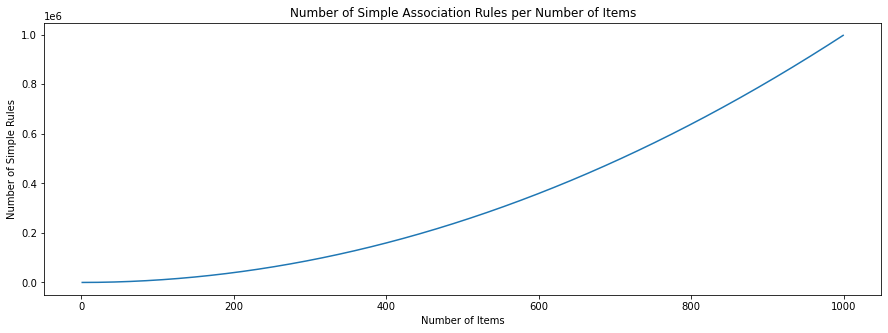

In [3]:
plt.figure(figsize=(15,5))
plt.title("Number of Simple Association Rules per Number of Items")
sns.lineplot(data = df_number_simple_association_rules, x='Number of Items', y='Number of Simple Rules')

Therefore, an import issue considered by MBA is how to reduce an enormous set of potential association rules by selecting only those which are useful for a specific business application. 

Later in this tutorial, we learn about the Apriori algorithm, a very important tool in MBA, especially when we are dealing with many items. But before that we need to understand some metrics used in MBA. These metrics are the ones that help selecting the useful association rules. 

While `association rules` tell us that two or more items are related, the `metrics` presented here allow us quantifying the usefulness of those relationships.

So, we start this tutorial presenting some useful metrics in MBA by building recommendations for a small bakery (smaller dataset). Later we present the Apriori algorithm building recommendations for products of an online retailer (larger dataset).

# Datasets

In this tutorial we use two datasets.

In order to understand each metric and its use we will make use of a fictional, artificially generated dataset, i.e., `Our little bakery` transaction dataset. This dataset consists of 298 transactions.

After that we use a bigger dataset: A transactional dataset which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. This one is available at the [UCI Machine Learning repository](http://archive.ics.uci.edu/ml/datasets/online+retail). In particular, we used a part of the dataset; only transactions of customers in The Netherlands.

# 🥐 Our Little Bakery at the Train Station 🥯

Imagine we have a little bakery in a local train station and we would like to offer an interesting bundle to our rushed morning customers. To find out the most interesting options using MBA, we have collected transactions containing 7  products.

The basic steps we need to apply for our MBA are:

- **Step 1**. Prepare data
- **Step 2**. Generate association rules
- **Step 3**. Use some metric to choose the most interesting rule(s) for the business case.


In [4]:
# importing transaction data

df_bakery = pd.read_csv('../data/raw/bakery_transaction_list_without_filter_4_B.csv')
df_bakery.head()

,TransactionId,Transaction
0,0,"croissant,coffee"
1,1,"croissant,brownie"
2,2,"brownie,croissant"
3,3,"sausage bread,coffee"
4,4,"orange juice,croissant"


In [5]:
df_bakery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionId  298 non-null    int64 
 1   Transaction    298 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.8+ KB


Our data is already presented in a pretty good way. We have 298 transactions, each one with unique products from our set of 7 products: `sausage bread`,`croissant`,`pain au chocolat`,`orange juice`,`coffee`, `cookie`, and `brownie`.

In [6]:
# Obtain unique items in transactions dataset
transactions = df_bakery['Transaction'].apply(lambda t: t.split(','))
transactions = list(transactions)
items_list = [item for transaction in transactions for item in transaction]
items_list = list(set(items_list))
items_list

['orange juice',
 'pain au chocolat',
 'croissant',
 'cookie',
 'coffee',
 'brownie',
 'sausage bread']

# Generating Simple Association Rules

As said before, a good way to start an MBA is by using simple association rules, i.e., rules with only one antecedent and one consequent.

To help with this task we use `permutations` from [`itertools` Python module](https://docs.python.org/3/library/itertools.html)

In [7]:
# Generate all possible rules
rules = list(permutations(items_list, 2))

# Print the set of rules
print(rules)

# Print the number of rules
print("\nNumber of Simple Association Rules:", len(rules))

[('orange juice', 'pain au chocolat'), ('orange juice', 'croissant'), ('orange juice', 'cookie'), ('orange juice', 'coffee'), ('orange juice', 'brownie'), ('orange juice', 'sausage bread'), ('pain au chocolat', 'orange juice'), ('pain au chocolat', 'croissant'), ('pain au chocolat', 'cookie'), ('pain au chocolat', 'coffee'), ('pain au chocolat', 'brownie'), ('pain au chocolat', 'sausage bread'), ('croissant', 'orange juice'), ('croissant', 'pain au chocolat'), ('croissant', 'cookie'), ('croissant', 'coffee'), ('croissant', 'brownie'), ('croissant', 'sausage bread'), ('cookie', 'orange juice'), ('cookie', 'pain au chocolat'), ('cookie', 'croissant'), ('cookie', 'coffee'), ('cookie', 'brownie'), ('cookie', 'sausage bread'), ('coffee', 'orange juice'), ('coffee', 'pain au chocolat'), ('coffee', 'croissant'), ('coffee', 'cookie'), ('coffee', 'brownie'), ('coffee', 'sausage bread'), ('brownie', 'orange juice'), ('brownie', 'pain au chocolat'), ('brownie', 'croissant'), ('brownie', 'cookie')

# Metrics : Selecting Useful Association Rules

We have just generated all possible 42 association rules but not all are useful and our goal is to choose only one bundle of products to offer to our clients.

The simplest metric that we can apply to select the most interesting rules is `Support`. 

## Support

`Support` measures the frequency with which item sets appear in transactions, i.e., 

$$Support = \frac{number\ of\ transactions\ with\ item(s)}{number\ of\ transactions}$$

It can be both applied to items as well as to association rules.

For instances, if the item croissant appears in 10 of 50 transactions the support is 10 out of 50 or 0.2.

On the other side, the support of for the association rule _"if croissant then orange juice"_ is calculated as the share of transactions that contained both croissant and orange juice. Notice that we would get the same value if we instead computed support for _"if orange juice then croissant"_. This means that support does not consider the direction of the association rule and if we want to know if buying orange juice influences someone in buying a croissant or the other way around, we need to consider another metric.

To facilitate calculating support and other metrics we one-hot encode our transactions. For this let's use our first `mlxtend` tool: `TransactionEncoder` in the following function.


In [8]:
def onehot_encode_transactions(transactions_column):
    """ Transform transactions dataframe into a one-hot encode dataframe 
    where each column consists of TRUE and FALSE values that indicate 
    whether an item was included or not in a transaction.  

    Parameters
    ----------
    transactions_column : series
        Column of dataframe consisting of transactions
        

    Returns
    -------
        dataframe

    """
    
    
    # create a list of sublists where each sublist has items in a transaction
    transactions = transactions_column.apply(lambda t: str(t).split(','))
    
    # Instantiate transaction encoder and identify unique items
    encoder = TransactionEncoder().fit(transactions)

    # One-hot encode transactions
    onehot = encoder.transform(transactions)

    # Convert one-hot encoded data to DataFrame
    onehot = pd.DataFrame(onehot, columns = encoder.columns_)

    return onehot

In [9]:
onehot_bakery = onehot_encode_transactions(df_bakery['Transaction'])
onehot_bakery

,brownie,coffee,cookie,croissant,orange juice,pain au chocolat,sausage bread
0,False,True,False,True,False,False,False
1,True,False,False,True,False,False,False
2,True,False,False,True,False,False,False
3,False,True,False,False,False,False,True
4,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...
293,True,True,False,False,True,True,False
294,True,False,False,True,True,False,True
295,True,False,True,True,True,False,False
296,False,False,True,True,False,True,True


Now that we have our transactions hot encoded, we can calculate our support metric easily.

Let's start by identifying frequently purchased items, which you do by computing support at the item-level. 

**Which item is the most frequently purchased?**

In [10]:
# Compute the support
support = onehot_bakery.mean()

# Print the support
support.sort_values(ascending=False)

croissant           0.402685
pain au chocolat    0.399329
orange juice        0.395973
brownie             0.379195
coffee              0.375839
cookie              0.345638
sausage bread       0.328859
dtype: float64

`Croissant` is the most purchased: 40.27% of the times.

We want to offer bundles that includes `coffee` or `orange juice` and one of the other 5 items. Which combination would be the most interesting, i.e., which combination has the highest support?

In [11]:
# Generating combinations 
for item in ['croissant', 'cookie', 'pain au chocolat', 'sausage bread', 'brownie']:
    onehot_bakery['coffee'+' '+item] = np.logical_and(onehot_bakery['coffee'], onehot_bakery[item])
    onehot_bakery['orange juice'+' '+item] = np.logical_and(onehot_bakery['orange juice'], onehot_bakery[item])

In [12]:
# Compute support
support = onehot_bakery.mean()
support.sort_values(ascending=False)

croissant                        0.402685
pain au chocolat                 0.399329
orange juice                     0.395973
brownie                          0.379195
coffee                           0.375839
cookie                           0.345638
sausage bread                    0.328859
coffee pain au chocolat          0.144295
coffee brownie                   0.137584
orange juice brownie             0.137584
orange juice cookie              0.134228
orange juice croissant           0.130872
orange juice sausage bread       0.117450
coffee croissant                 0.110738
orange juice pain au chocolat    0.104027
coffee sausage bread             0.100671
coffee cookie                    0.090604
dtype: float64

Based on the support metric, `coffee` and `pain au chocolat` appear to be the best option for [bundling](https://en.wikipedia.org/wiki/Product_bundling).

In [13]:
def support_item(item):
    """ Calculate support of a item.

    Parameters
    ----------
    item : series
        Column of onehot transactions dataframe.
        
        

    Returns
    -------
        float
        Support of the item in that column.

    """
    
    
    support = round(item.mean(),4)
    
    return support

In [14]:
support_item(onehot_bakery['coffee'])

0.3758

In [15]:
def support_assocation(antecedent, consequent):
    """ Calculate support of a association rule.

    Parameters
    ----------
    
    antecedent : series
        Column of onehot transactions dataframe.
        
    consequent : series
        Column of onehot transactions dataframe.

    Returns
    -------
        float
        Support of the item in that column.

    """
    
    # support of each item
    supportA = support_item(antecedent)
    supportC = support_item(consequent)
    
    # suport of association of items
    supportAC = round(np.logical_and(antecedent,consequent).mean(),4)
    
    return supportAC
    

In [16]:
support_coffee_croissant = support_assocation(onehot_bakery['coffee'], onehot_bakery['croissant'])
support_coffee_croissant

0.1107

For larger datasets it is usually necessary to prune both items and rules, i.e., discard items and or rules that present support under a certain threshold. 

Soon, we will apply pruning using other metrics.

## Confidence

Support is a useful metric but it can be misleading since it can point to association rules that arises because both items considered are popular. In addition, it does not consider the direction of the relationship of the items.

Fortunately, through the use of other metrics we can improve over support.

One of those metrics is `Confidence`. Confidence tells us the probability that someone will purchase the _consequent_ item, given that this person has purchased the _antecedent_ item.

This metric is calculated as follows:

$$Confidence(antecedent, consequent) = \frac{Support(antecedent \& consequent)}{Support(consequent)}$$

This can be useful when you think about promoting a product, [cross-selling, or upselling](https://www.bigcommerce.com/ecommerce-answers/what-difference-between-upselling-and-cross-selling/).

I.e., it allows us to answer questions such as: 

- **Should I use coffee to promote the sales of pain au chocolat or otherwise?**


In [17]:
def confidence(antecedent, consequent):
    """ Calculate confidence for assosication rule {antecendent} -> {consequent}

    Parameters
    ----------
    antecedent : series
        Column of antecendent item of the onehot transactions dataframe.
        
    consequent : series
        Column of consequent item of the onehot transactions dataframe.
        

    Returns
    -------
        float

    """
    
    # Compute support for antecedent and consequent
    supportAC = support_assocation(antecedent,consequent)
    
    # Compute support for antecedent
    supportA = support_item(antecedent)
    
    # Compute support for consequent
    supportC = support_item(consequent)
    
    # Compute confidence for rule antecedent -> consequent
    confidenceAC = round(supportAC / supportC, 2)
    
    return confidenceAC

In [18]:
confidence_pain_coffee = confidence(onehot_bakery['pain au chocolat'],onehot_bakery['coffee'])

confidence_pain_coffee

0.38

In [19]:
confidence_coffee_pain = confidence(onehot_bakery['coffee'],onehot_bakery['pain au chocolat'])

confidence_coffee_pain

0.36

The confidence is higher for $\{pain\ au\ chocolat\} \rightarrow \{coffee\}$ which suggests using `pain au chocolat` to promote the sale of `coffee`.

## Lift

Lift is another metric that can be used to refine support. It informs us how confident we can be about an association rule. It is calculated as follows:

$$Lift(antecedent, consequent) = \frac{Support(antecedent\& consequent)}{Support(antecedent)*Support(consequent)}$$

Observe that the numerator gives us the proportion of transactions that contain both _antecedent_ and _consequent_. The denominator tells us what that proportion would be if _antecedent_ and _consequent_ were randomly and independently assigned to transactions. 

A `lift > 1` indicates a strong association because the relationship is unlikely to be explained by random chance.

This metric can be used to answer the following questions:

- **How confident can I be about the association rule $\{pain\ au\ chocolat\} \rightarrow \{coffee\}$ ?**


- **Is the relationship $\{pain\ au\ chocolat\} \rightarrow \{coffee\}$ a meaningful relationship or can it happen by random chance?**


In [20]:
def lift(antecedent, consequent):
    """ Calculate lift for assosication rule {antecendent} -> {consequent}

    Parameters
    ----------
    antecedent : series
        Column of antecendent item of the onehot transactions dataframe.
        
    consequent : series
        Column of consequent item of the onehot transactions dataframe.
        

    Returns
    -------
        float

    """
    
    # Compute support for antecedent and consequent
    supportAC = support_assocation(antecedent,consequent)
    
    # Compute support for antecedent
    supportA = support_item(antecedent)
    
    # Compute support for consequent
    supportC = support_item(consequent)
    
    # Compute lift
    lift = supportAC / (supportA * supportC)
    
    return lift

In [21]:
Lift_pain_coffee = lift(onehot_bakery['pain au chocolat'],onehot_bakery['coffee'])
Lift_pain_coffee

0.9616349633679057

Lift is less than 1.00, so we cannot be confident that this pair  did not arise by random chance.

## Leverage

`Leverage` is a metric similar to Lift. Lift is calculated as ratio while leverage as difference, i.e., 

$$Leverage(antecedent, consequent) = Support(antecedent\& consequent) - (Support(antecedent)*Support(consequent))$$

This makes that leverage is bounded from below by `-1` and from above by `+1`, making it easy to identify high and low values. Lift, to the contrary, is bound from below by 0 and from above by infinity. 

Namely,

$$ Lift > 0 ,$$ and threshold for a good association rule is 1.

$$ -1 < Leverage < 1,$$ and threshold for a good association rule is 0.


In [22]:
def leverage(antecedent, consequent):
    """ Calculate leverage for assosication rule {antecendent} -> {consequent}

    Parameters
    ----------
    antecedent : series
        Column of antecendent item of the onehot transactions dataframe.
        
    consequent : series
        Column of consequent item of the onehot transactions dataframe.
        

    Returns
    -------
        float

    """
    
    # Compute support for antecedent and consequent
    supportAC = support_assocation(antecedent,consequent)
    
    # Compute support for antecedent
    supportA = support_item(antecedent)
    
    # Compute support for consequent
    supportC = support_item(consequent)
    
    # Compute lift
    leverage = round(supportAC - (supportA * supportC),4)
    
    return leverage

In [23]:
Leverage_pain_coffee = leverage(onehot_bakery['pain au chocolat'],onehot_bakery['coffee'])
Leverage_pain_coffee

-0.0058

Leverage confirms that this is not a strong association rule.

## Conviction

`Conviction` is another metric that tells us if a rule is viable or not. However, it is more complicate and harder to interpret than Lift and Leverage.

$$Conviction(antecedent, consequent) = Support(antecedent\& NOT\ consequent) - (Support(antecedent)*Support(NOT\ consequent))$$

The support of _antecedent_ and NOT _consequent_ is the share of all transactions that contain _antecedent_, but not _consequent_. The support of NOT _consequent_ is simply the share of all transactions that do not include _consequent_. 

**Conviction > 1** points to a viable association rule.


In [24]:
def conviction(antecedent, consequent):
    """ Calculate leverage for assosication rule {antecendent} -> {consequent}

    Parameters
    ----------
    antecedent : series
        Column of antecendent item of the onehot transactions dataframe.
        
    consequent : series
        Column of consequent item of the onehot transactions dataframe.
        

    Returns
    -------
        float

    """
    # Compute support for antecedent AND consequent
    supportAC = np.logical_and(antecedent, consequent).mean()

    # Compute support for antecedent
    supportA = antecedent.mean()

    # Compute support for NOT consequent
    supportnC = 1.0 - consequent.mean()

    # Compute support for antecedent and NOT consequent
    supportAnC = supportA - supportAC

    # Return conviction
    return round(supportA * supportnC / supportAnC,4)

In [25]:
Conviction_pain_coffee = conviction(onehot_bakery['pain au chocolat'],onehot_bakery['coffee'])
Conviction_pain_coffee

0.9773

Conviction also confirms that $\{pain\ au\ chocolat\} \rightarrow \{coffee\}$ is not a viable relationship. 

## Zhang's Metric : Association and Dissociation

Until now we've talked about metrics related with association, i.e., if a customer buys product A probably, he or she will also buy product B.

What if buying product, A predicts that the customer will not buy product C? That is dissociation and it can be measure by Zhang's metric.

Sales can be improved using association metrics and putting highly associated products together. Moreover, we can also obtain the same effect by separating products that are dissociated.

[Zhang's metric](https://www.semanticscholar.org/paper/Association-Rules-Zhang/de6084d322eb824dc1abbc29159f62a1eefb63f9) receive values from -1 till 1. Value of +1 indicates perfect association, while -1 indicates perfect dissociation.

Zhang's metric calculation can be also be derived from Support, as follows:

$$Zhang(A \rightarrow C) = \frac{Support(A \& C) - Support(A)*Support(C)}{\max[Support(A \& C)*(1 - Support(A)),Support(A)*(Support(C) - Support(A \& C))]}  $$


In [26]:
def zhang(antecedent, consequent):
    """ Calculate leverage for assosication rule {antecendent} -> {consequent}

    Parameters
    ----------
    antecedent : series
        Column of antecendent item of the onehot transactions dataframe.
        
    consequent : series
        Column of consequent item of the onehot transactions dataframe.
        

    Returns
    -------
        float

    """
    
    # Compute the support of each item
    supportA = antecedent.mean()
    supportC = consequent.mean()

    # Compute the support of both items
    supportAC = np.logical_and(antecedent, consequent).mean()

    # Complete the expressions for the numerator and denominator
    numerator = supportAC - supportA*supportC
    denominator = max(supportAC*(1-supportA), supportA*(supportC-supportAC))

    # Return Zhang's metric
    return round(numerator / denominator,4)

In [27]:
zhang_pain_coffee = zhang(onehot_bakery['pain au chocolat'],onehot_bakery['coffee'])
zhang_pain_coffee

-0.0626

It seems that cross-selling pain au chocolat and coffee is not a good idea at all. Zhang's metric is negative which means these products are dissociated.

As we can see making a decision only based on Support is not always a good idea.

## Using Multiple Metrics

Whenever we perform MBA, we normally apply 3 steps:

1. Generate `association rules`
2. Prune these rules using `metrics` 
3. Use intuition and common sense considering the use case before making a recommendation. This because after steps 1 and 2 we usually are left with more than one rule to choose.

The problem we considered so far didn't show any interesting pair of products that would be viable for bundling. We limited our selves to have always present `coffee` or `orange juice`. 

Probably, a better way would be to filter by considering a lower bound in support or another metric. We thought that including coffee or orange juice was a good idea, but we saw that the transactional data told us something else.

Let's consider all products of our bakery and apply what we've learn so far. Because we only have 7 products, it's possible to consider all 42 association rules. Let’s calculate the metrics we've just introduced for these association rules and then prune them by applying some thresholds.


In [28]:
def create_rules_dataframe(onehot_df):
    """ Create dataframe with association rules and calculate metrics: support, confidence, lift, leverage,
    conviction, and Zhang's metrics.
    
    Parameters
    ----------
    onehot_df : dataframe
        Dataframe resulting of onehot encoding of a transaction dataframe, i.e., columns are items, rows are transaction ids,
        and cell shows if a item is in the transaction (True) or not (False)
        

    Returns
    -------
        dataframe    
    
    """

    antecedent_list = []
    consequent_list = []
    support_ant_list = []
    support_cons_list = []
    support_list = []
    confidence_list = []
    lift_list = []
    leverage_list = []
    conviction_list = []
    zhang_list = []

    permut = permutations(onehot_df.columns.to_list(),2)
    
    for item in permut: 
        antecedent = item[0]
        consequent = item[1]
        antecedent_list.append(antecedent)
        consequent_list.append(consequent)
        support_ant_list.append(support_item(onehot_df[antecedent]))
        support_cons_list.append(support_item(onehot_df[consequent]))
        support_list.append(support_assocation(onehot_df[antecedent],onehot_df[consequent]))
        confidence_list.append(confidence(onehot_df[antecedent], onehot_df[consequent]))
        lift_list.append(lift(onehot_df[antecedent], onehot_df[consequent]))
        leverage_list.append(leverage(onehot_df[antecedent], onehot_df[consequent]))
        conviction_list.append(conviction(onehot_df[antecedent], onehot_df[consequent]))
        zhang_list.append(zhang(onehot_df[antecedent], onehot_df[consequent]))
    
    return pd.DataFrame({"antecedent":antecedent_list,
                         "consequent":consequent_list,
                         "antecedent_support":support_ant_list,
                         "consequent_support":support_cons_list,
                         "support":support_list,
                         "confidence":confidence_list,
                         "lift":lift_list,
                         "leverage":leverage_list, 
                         "conviction":conviction_list,
                         "zhang":zhang_list})    

In [29]:
df_bakery = pd.read_csv('../data/raw/bakery_transaction_list_without_filter_4_B.csv')
onehot_bakery = onehot_encode_transactions(df_bakery['Transaction'])

In [30]:
df_all_rules = create_rules_dataframe(onehot_bakery)
df_all_rules

,antecedent,consequent,antecedent_support,consequent_support,support,confidence,lift,leverage,conviction,zhang
0,brownie,coffee,0.3792,0.3758,0.1376,0.37,0.965591,-0.0049,0.9796,-0.0546
1,brownie,cookie,0.3792,0.3456,0.0906,0.26,0.691331,-0.0405,0.8598,-0.4184
2,brownie,croissant,0.3792,0.4027,0.1208,0.30,0.791074,-0.0319,0.8766,-0.2984
3,brownie,orange juice,0.3792,0.3960,0.1376,0.35,0.916336,-0.0126,0.9480,-0.1283
4,brownie,pain au chocolat,0.3792,0.3993,0.1577,0.39,1.041511,0.0063,1.0284,0.0643
5,brownie,sausage bread,0.3792,0.3289,0.0940,0.29,0.753695,-0.0307,0.8922,-0.3451
6,coffee,brownie,0.3758,0.3792,0.1376,0.36,0.965591,-0.0049,0.9793,-0.0543
7,coffee,cookie,0.3758,0.3456,0.0906,0.26,0.697586,-0.0393,0.8622,-0.4100
8,coffee,croissant,0.3758,0.4027,0.1107,0.27,0.731491,-0.0406,0.8468,-0.3701
9,coffee,orange juice,0.3758,0.3960,0.1275,0.32,0.856758,-0.0213,0.9142,-0.2112


Let's start by filtering `leverage > 0` which should give use viable choices for cross-selling.

In [31]:
df_filter = df_all_rules[df_all_rules['leverage'] > 0]
df_filter

,antecedent,consequent,antecedent_support,consequent_support,support,confidence,lift,leverage,conviction,zhang
4,brownie,pain au chocolat,0.3792,0.3993,0.1577,0.39,1.041511,0.0063,1.0284,0.0643
30,pain au chocolat,brownie,0.3993,0.3792,0.1577,0.42,1.041511,0.0063,1.0261,0.0664


We end up with 2 associations rules.

Both have `Zhang's metric > 0` which means they are associated. Therefore, we use `brownie` and `pain au chocolat` not only as a bundling, but also for cross-selling. Although, the value of Confidence is very close to both, we could say that if we want to use one product to promote the other, pain au chocolat would be the product to promote brownie.

For this example, we’ve used a small dataset and we’ve just considered simple association rules. Although, it was a very useful example for building the basis on Market Basket Analysis, in real world examples the number of products is larger and more complex association rules might be considered. In those cases, techniques such as the Apriori algorithm and aggregation are very important. Next, we will present and explore those technique for different use cases.


# Dealing with Larger Transactional Datasets

We saw previously that even considering simple rules (one antecedent and one consequent) the number of association rules can grow fast with the number of item sets. When we have a large number of items and we start considering more complex rules the number of rules explodes and it becomes impossible to evaluate all association rules like we did previously. Then we need to apply techniques to help us translating those vast amounts of customer decisions into a small number of useful rules. 

Typically, there are two techniques which can be used to simplify MBA problems that involve many items:

1. `Pruning`: Remove items and rules with low support or poor performance considering some other metric.
2. `Aggregation`: Group items in categories (e.g., food, electronics, clothing) and perform MBA over these categories

In this section, we illustrate these techniques and introduce the Apriori algorithm with the help of a part of the [Online Retail Dataset](http://archive.ics.uci.edu/ml/datasets/online+retail). The dataset with transactions of users in the Netherlands contains 101 transactions and 814 items. Below you can have an idea how fast the number of association rules grows when start considering combinations of k items from a total of n items, in our case n = 814.

Details on how the original dataset was processed to get to the data we are using here can be accessed in this [notebook](https://github.com/dpbac/marketing_basket_analysis/blob/master/notebooks/UCI%20dataset.ipynb).

In [32]:
import operator as op
from functools import reduce

def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom  # or / in Python 2

In [33]:
number_of_items = np.arange(1, 10)
number_of_rules = []
for r in range(1,10):
    number_of_rules.append(ncr(814, r))

In [34]:
df_number_association_rules = pd.DataFrame({'Number of Items chose among 814 items':number_of_items,'Number of Rules':number_of_rules})
df_number_association_rules.head(10)

,Number of Items chose among 814 items,Number of Rules
0,1,814
1,2,330891
2,3,89561164
3,4,18158526001
4,5,2941681212162
5,6,396636683439843
6,7,45783205745627592
7,8,4618380879590183343
8,9,413601665438854197162


In [35]:
del df_number_association_rules

## The Apriori Algorithm

The `Apriori algorithm` helps reducing the complexity of the MBA problem by eliminating low support item sets before generating the association rules.

But how can we remove an itemset without knowing that we are not eliminating interesting association rules? Previously, in our bakery example we performed pruning when we only consider item sets which contained coffee or orange juice. As a result, we didn't come out with viable bundles because without knowing we were eliminating item sets that were indeed the best ones for promotion.

The Apriori algorithm offers an alternative approach that does not require the enumeration of all item sets. It is based on the Apriori principle states that `subsets of frequent sets must also be frequent`. By applying this principle, the algorithm retains `frequent sets`, i.e., item sets that exceed some minimal level of support, and prune those that cannot be said to be frequent.

For example, if `cookie` is considered infrequent item because it falls bellow the minimum support then the itemset `{cookie, coffee}` as well as the itemset `{cookie, coffee, croissant}` are eliminated. In this way, computing support just once for cookie make possible to eliminate many other rules without having to enumerate them.

To apply the Apriori Algorithm we will make use of the [Mlxtend (machine learning extensions)](http://rasbt.github.io/mlxtend/) Python package.

The steps performed to apply the Apriori algorithm consist of:

- **Step 1:** Pre-process the transaction dataset in order to obtain a `one-hot encoded dataframe` (See section about metrics)

- **Step 2:** Apply the Apriori algorithm to generate `frequent item sets` setting minimum support (`min_support`) and number of items (`max_len`) for the pruning process. 

    Notice that the version of the Apriori algorithm used by [apriori from mlxtend.frequent_patterns](http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.frequent_patterns/#apriori) allows you also to prune by the number of items in the item sets.

- **Step 3:** Generate `association rules` using the frequent item sets obtained in Step 1 and defining metric and its minimum threshold.

    [association_rules from mlxtend.frequent_patterns](http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.frequent_patterns/#association_rules) support all metrics that were presented previously with exception of the Zhang's metric. So, you can perform pruning using the metric that seems more interesting for your user case.
    
Let's apply the steps above and use the Apriori algorithm to our dataset considering three use cases:

1. **Bundle of products:** Which products could we offer together?
2. **Cross-promotion:** Which product should we use to promote another product?
3. **Cross-promotion to sell a target product:** If we want to promote a specific product which product(s) should we use to promote it? 


In [36]:
df_NL = pd.read_csv(r"C:\MKB_datalab\Tutorials\marketing-analysis-market-basket-analysis\data\raw\retailer_nl.csv")
df_NL.head()

,TransactionId,Transaction
0,536403,"hand warmer bird design,postage"
1,539491,"pack of 12 woodland tissues,pack of 12 pink po..."
2,539731,"pack of 72 retrospot cake cases,easter tin kee..."
3,541206,"pack of 12 pink polkadot tissues,rose cottage ..."
4,541570,"strawberry lunch box with cutlery,dinosaur lun..."


In [37]:
# One-hot encoded dataframe
onehot_NL = onehot_encode_transactions(df_NL["Transaction"])

onehot_NL

,,1 hanger,birthday card,pink spots,retro spot,10 colour spaceboy pen,12 pencil small tube woodland,12 pencils small tube red retrospot,12 pencils tall tube red retrospot,12 pencils tall tube woodland,...,wrap red apples,wrap wedding day,yellow metal chicken heart,zinc heart t-light holder,zinc star t-light holder,zinc folkart sleigh bells,zinc metal heart decoration,zinc t-light holder star large,zinc t-light holder stars small,zinc willie winkie candle stick
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Let's apply the Apriori algorithm pruning and generate frequent item sets with a minimum `support` 0.005 and a maximum `item number` threshold 2.

In [38]:
# Import seaborn under its standard alias
import seaborn as sns

# Apply the Apriori algorithm with a support value of 0.005
frequent_itemsets = apriori(onehot_NL, 
                            min_support = 0.005,           
                            use_colnames = True, 
                            max_len = 2)

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x : len(list(x)))

frequent_itemsets.head()

,support,itemsets,length
0,0.049505,(),1
1,0.039604,( 1 hanger ),1
2,0.039604,( birthday card),1
3,0.009901,( pink spots),1
4,0.019802,( retro spot),1


In [39]:
len(frequent_itemsets)

52676

But how we choose the minimum support value?

We can try different values, check the number of frequent item sets and pick the value of support that provides us a convenient number of item sets. Is 52676 too much? Then pick a higher `min_support`. Tickling the number of items is also a way to reduce, allowing less items will produce less frequent item sets.

A good way to have an idea on the range of values you can use for support is to plot a `scatterplot` using support x confidence. This because Bayardo and Agrawal showed in their [1999 paper](http://rakesh.agrawal-family.com/papers/kdd99rules.pdf) that the best-performing rules along a variety of common metrics, including the ones we explored here, must be located on the confidence-support border. 

The scatterplot below includes also a third dimension, i.e., another metric: lift. Observe that the values support goes until around 0.2, and most of the point are below support 0.125

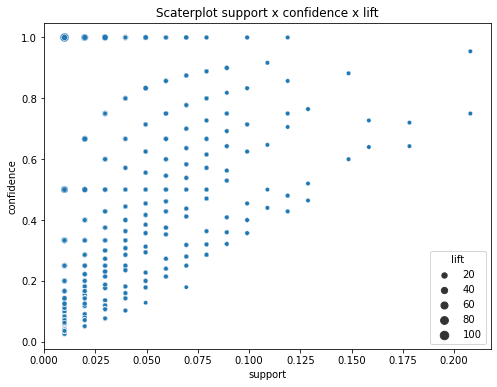

In [40]:
# Generate association rules without performing additional pruning
rules = association_rules(frequent_itemsets, 
                          metric = 'support', 
                          min_threshold = 0.00)

# Generate scatterplot using support and confidence
plt.figure(figsize=(8,6))
plt.title("Scaterplot support x confidence x lift")
sns.scatterplot(x = "support", 
                y = "confidence", 
                size = "lift",
                data = rules)
plt.show()

Let's reduce the number of items by choosing a larger minimum support value and generate the association rules for those frequent item sets.

In [41]:
# Import Apriori algorithm
from mlxtend.frequent_patterns import apriori

# Compute frequent itemsets using a minimum support of 0.1
frequent_itemsets_1 = apriori(onehot_NL, 
                            min_support = 0.1,
                            max_len = 2,
                            use_colnames = True )

frequent_itemsets_1['length'] = frequent_itemsets_1['itemsets'].apply(lambda x : len(list(x)))

frequent_itemsets_1.head()

,support,itemsets,length
0,0.118812,(card dolly girl),1
1,0.108911,(charlotte bag pink polkadot),1
2,0.108911,(charlotte bag suki design),1
3,0.128713,(childrens apron spaceboy design),1
4,0.108911,(circus parade lunch box),1


In [42]:
len(frequent_itemsets_1)

36

First, let's generate association rules without pruning, i.e., `min_threshold = 0.0`.

In [43]:
# Compute the association rules for frequent_itemsets_1 without pruning 
rules_1 = association_rules(frequent_itemsets_1, 
                          metric = 'support', 
                          min_threshold = 0.0)
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(round snack boxes set of 4 fruits),(dolly girl lunch box),0.168317,0.217822,0.108911,0.647059,2.970588,0.072248,2.216172
1,(dolly girl lunch box),(round snack boxes set of 4 fruits),0.217822,0.168317,0.108911,0.500000,2.970588,0.072248,1.663366
2,(round snack boxes set of4 woodland),(dolly girl lunch box),0.247525,0.217822,0.158416,0.640000,2.938182,0.104500,2.172717
3,(dolly girl lunch box),(round snack boxes set of4 woodland),0.217822,0.247525,0.158416,0.727273,2.938182,0.104500,2.759076
4,(spaceboy lunch box),(dolly girl lunch box),0.277228,0.217822,0.207921,0.750000,3.443182,0.147535,3.128713
5,(dolly girl lunch box),(spaceboy lunch box),0.217822,0.277228,0.207921,0.954545,3.443182,0.147535,15.900990
6,(round snack boxes set of4 woodland),(plasters in tin spaceboy),0.247525,0.118812,0.118812,0.480000,4.040000,0.089403,1.694593
7,(plasters in tin spaceboy),(round snack boxes set of4 woodland),0.118812,0.247525,0.118812,1.000000,4.040000,0.089403,inf
8,(round snack boxes set of4 woodland),(red retrospot charlotte bag),0.247525,0.118812,0.108911,0.440000,3.703333,0.079502,1.573550
9,(red retrospot charlotte bag),(round snack boxes set of4 woodland),0.118812,0.247525,0.108911,0.916667,3.703333,0.079502,9.029703


Now that we have our association rules let's consider some possible use cases to illustrate the use of MBA and what we've learnt so far.

### 🛍️ Use Case 1 - Bundle 

Let's say we would like to find two items to be sold together.

We can start by inspecting the table above for high support values. But even better, we can use a `heatmap` to spot faster which values are interesting for us.

A heatmap as below is useful to help us during the pruning process because it helps us visualizing the intensity of the relationships between pairs of objects, i.e., the value of a metric of association rules between antecedent and consequent.

In [44]:
# Replace frozen sets with strings
rules_1['antecedents'] = rules_1['antecedents'].apply(lambda x: ','.join(list(x)))
rules_1['consequents'] = rules_1['consequents'].apply(lambda x: ','.join(list(x)))

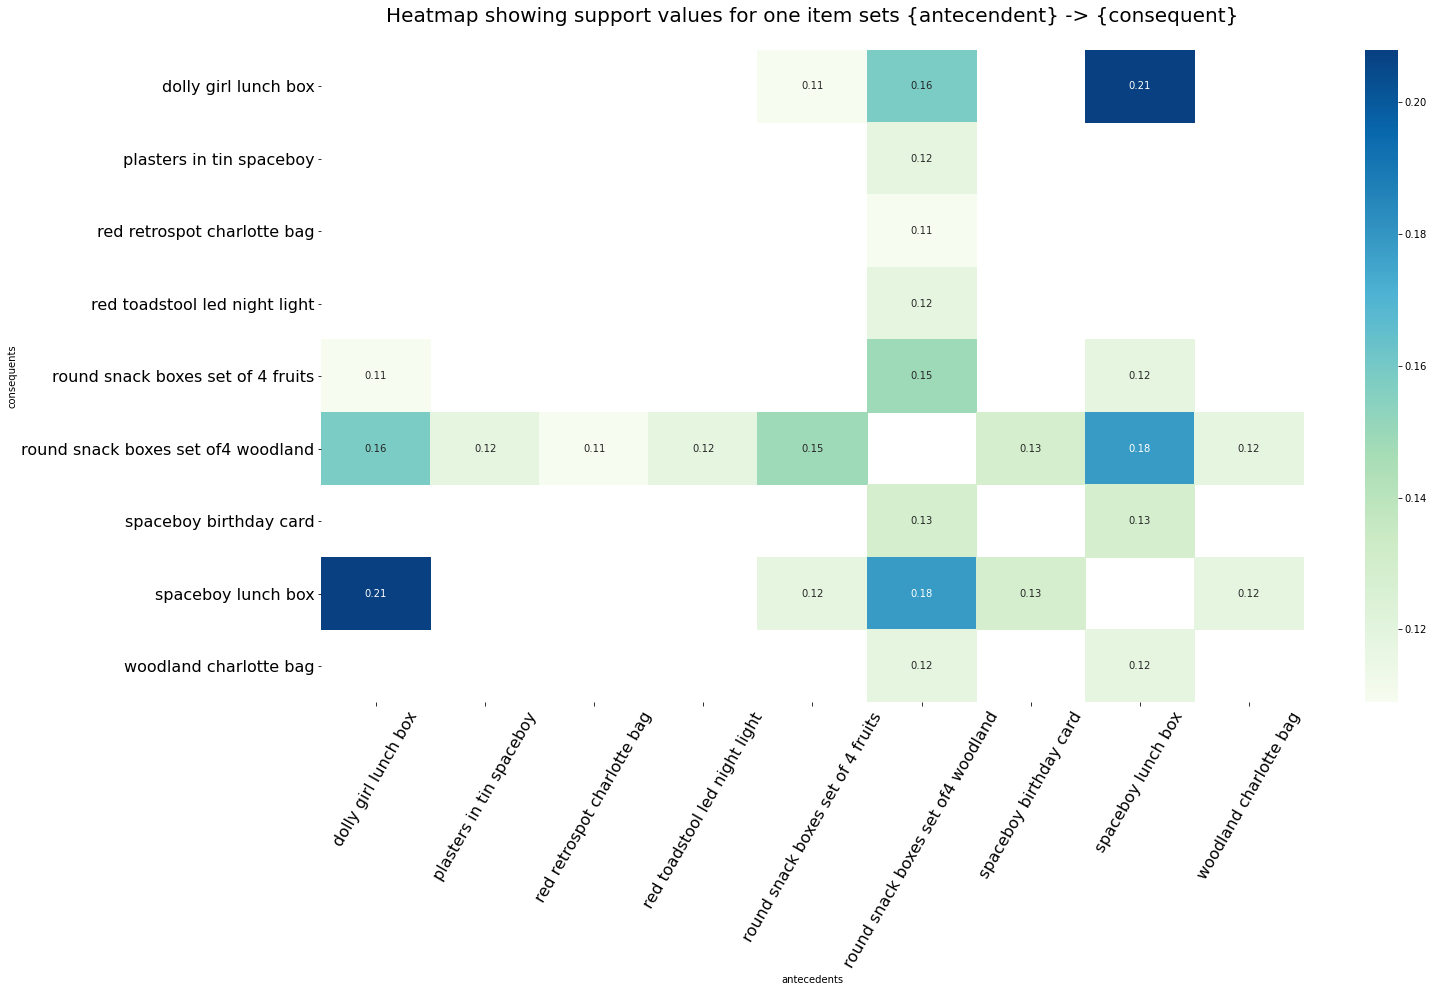

In [45]:
# Transform data to matrix format and generate heatmap
pivot = rules_1.pivot(index='consequents', columns='antecedents', values='support')
# sns.heatmap(pivot)

# Generate a heatmap with annotations on and the colorbar off
plt.figure(figsize=(22,12))
plt.title("Heatmap showing support values for one item sets {antecendent} -> {consequent}\n", size = 20)
sns.heatmap(pivot, annot = True, cbar = True, cmap='GnBu')

# Format and display plot
plt.yticks(rotation=0, size = 16)
plt.xticks(rotation=60, size = 16)
plt.show()

The heatmap above shows values of support for the association rules. Lighter colors mean lower intensity, darker color higher intensity, and white means that no association rule was identified for that itemset. We can easily see high support for the association rule $\{ dolly\ girl\ lunch\ box\} \rightarrow \{spaceboy\ lunch\ box\}$, and vice-versa.

In [46]:
# Apply a 0.2 antecedent support threshold, 0.60 confidence threshold, and 2.50 lift threshold
filtered_rules_1 = rules_1[(rules_1['support'] > 0.2) &
                           (rules_1['confidence'] > 0.6) &
                           (rules_1['lift'] > 2.50)]


In [47]:
filtered_rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,spaceboy lunch box,dolly girl lunch box,0.277228,0.217822,0.207921,0.750000,3.443182,0.147535,3.128713
5,dolly girl lunch box,spaceboy lunch box,0.217822,0.277228,0.207921,0.954545,3.443182,0.147535,15.900990


After filtering with multiple metrics, we confirm that selling these products together is a good option. We have high lift that tells us that this bundle is viable because it does not happen by chance.

### 🛍️ Use Case 2: Cross-promotion

And if we decide we want to use one of these products to promote the other? 

From the filtered rules above we can see that the best choice is to use `dolly girl lunch box` to promote `spaceboy lunch box`. Confidence tells us that we can be 95% confident that someone that buys `dolly girl lunch box` will buy `spaceboy lunch box`.

The heatmap using confidence values confirms it.

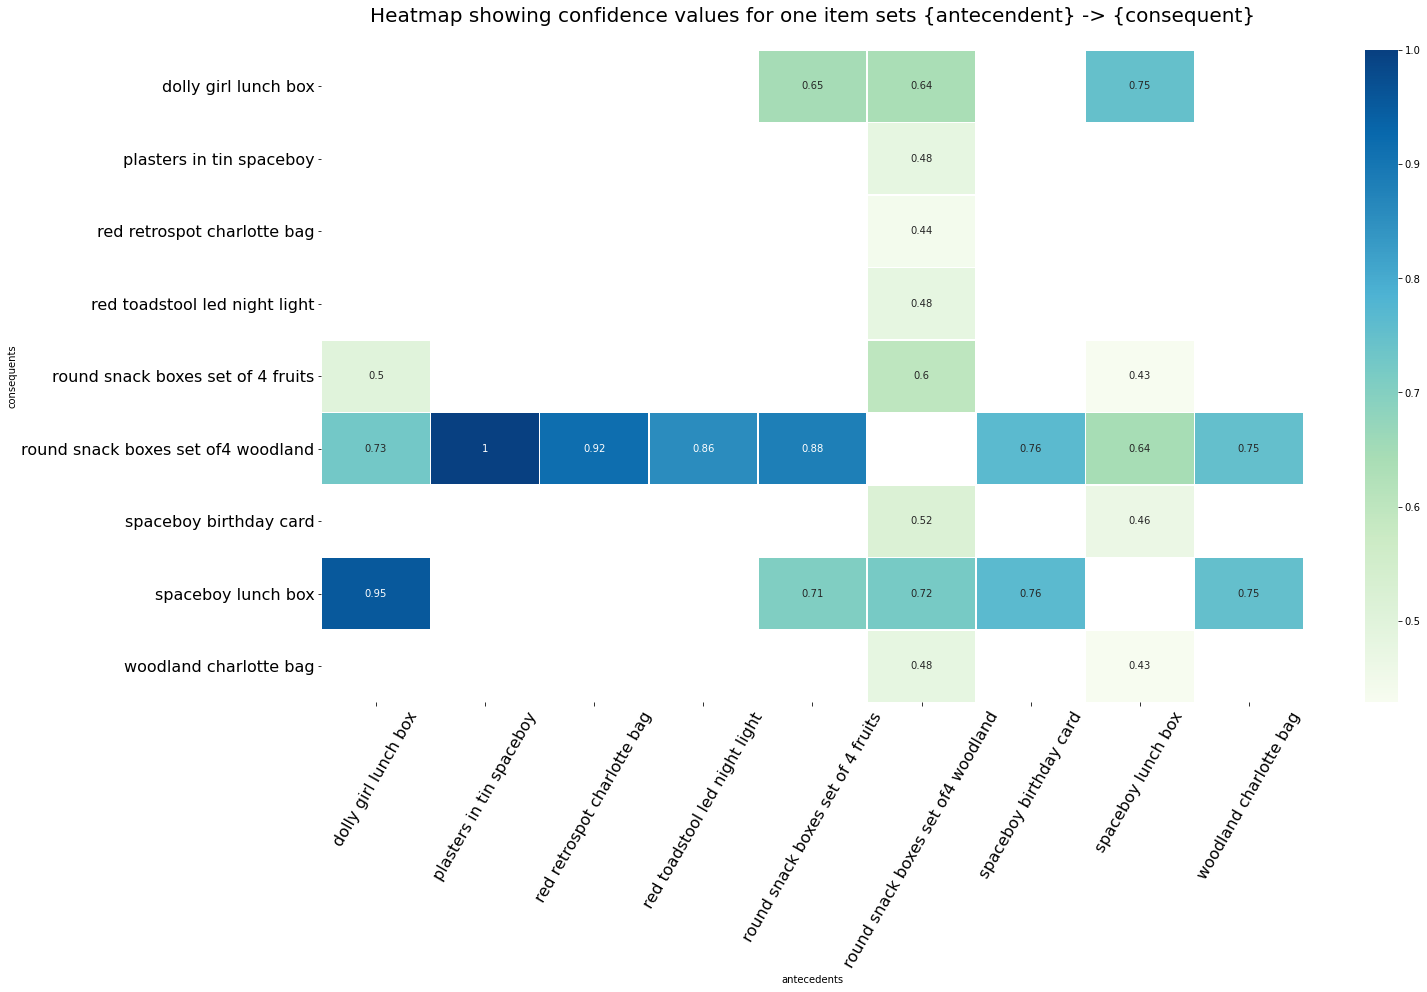

In [48]:
# Transform data to matrix format and generate heatmap
pivot = rules_1.pivot(index='consequents', columns='antecedents', values='confidence')
# sns.heatmap(pivot)

# Generate a heatmap with annotations on and the colorbar off
plt.figure(figsize=(22,12))
plt.title("Heatmap showing confidence values for one item sets {antecendent} -> {consequent}\n", size = 20)
sns.heatmap(pivot, annot = True, cbar = True, cmap='GnBu',linewidths=.5)

# Format and display plot
plt.yticks(rotation=0, size = 16)
plt.xticks(rotation=60, size = 16)
plt.show()

### 🛍️ Use Case 3 - Cross-promotion to Sell a Target Consequent

For this use case we have a product that we would like to promote. We need to know which product(s) would help promoting this specific product.

Let's introduce another nice and useful visualization that will show us the existing rules between antecedents and consequents: `parallel coordinates plot`.

In [49]:
def rules_to_coordinates(rules):
    """ Convert association rules to coordinates
    
    Parameters
    ----------
    rules : Dataframe
        Dataframe of association rules.
        

    Returns
    -------
        dataframe
    """

    # Convert rules to coordinates.
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules['rule'] = rules.index
    
    # Define coordinates and label
    coords = rules[['antecedent','consequent','rule']]
    
    return coords

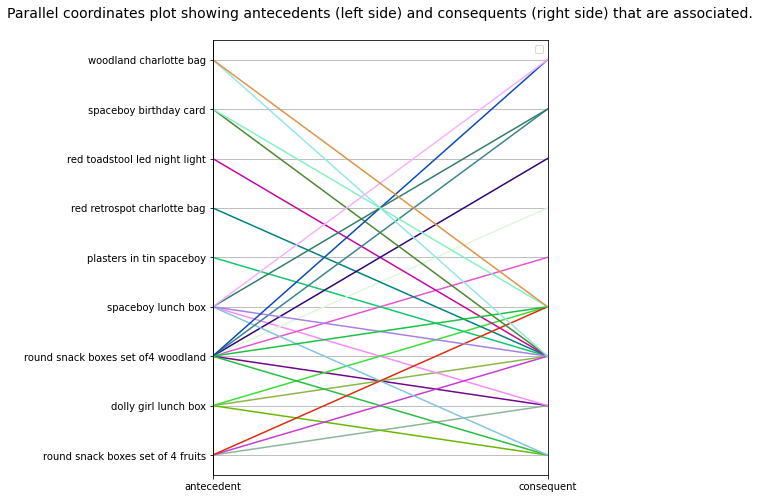

In [50]:
# Import Apriori algorithm
from mlxtend.frequent_patterns import apriori

# Compute frequent itemsets using a minimum support of 0.1
frequent_itemsets_1 = apriori(onehot_NL, 
                            min_support = 0.1,
                            max_len = 2,
                            use_colnames = True )

# Compute the association rules for frequent_itemsets_1 without pruning 
rules_1 = association_rules(frequent_itemsets_1, 
                          metric = 'support', 
                          min_threshold = 0.0)

# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(rules_1)

# Generate parallel coordinates plot
plt.figure(figsize=(6,8))
plt.title("Parallel coordinates plot showing antecedents (left side) and consequents (right side) that are associated.\n", 
          size = 14)
parallel_coordinates(coords, 'rule')
plt.legend([])
plt.show()

Each row of the parallel coordinates plot above corresponds to an item of the store. Although, it is not shown, the labels on the right side of the plot are identical to those on the left side. Each line connects an antecedent (left side) with a consequent (right side).

Observe that some items are antecedents for many other items, while some other items are antecedent to only one item (e.g., red toadstool led night light, red retrospot charlotte bag).

Because we have selected `max_len = 2`, we are only showing item sets with one item.  However, it is possible to use the same plot with more items per item sets. 

Consider we would like to promote `round snack boxes set of 4 fruits`. From the parallel coordinates plot we can observe that many antecedents are related to this product. Our job is to find the "one"; that product that will help boosting the sales of `round snack boxes set of 4 fruits`.

First, we create a dataframe only with antecedents for which the consequent is `round snack boxes set of 4 fruits`.

After that we apply different metrics to try to reduce these association rules to a unique association rule showing the best product to promote our chosen product.


In [51]:
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent,consequent,rule
0,(round snack boxes set of 4 fruits),(dolly girl lunch box),0.168317,0.217822,0.108911,0.647059,2.970588,0.072248,2.216172,round snack boxes set of 4 fruits,dolly girl lunch box,0
1,(dolly girl lunch box),(round snack boxes set of 4 fruits),0.217822,0.168317,0.108911,0.500000,2.970588,0.072248,1.663366,dolly girl lunch box,round snack boxes set of 4 fruits,1
2,(round snack boxes set of4 woodland),(dolly girl lunch box),0.247525,0.217822,0.158416,0.640000,2.938182,0.104500,2.172717,round snack boxes set of4 woodland,dolly girl lunch box,2
3,(dolly girl lunch box),(round snack boxes set of4 woodland),0.217822,0.247525,0.158416,0.727273,2.938182,0.104500,2.759076,dolly girl lunch box,round snack boxes set of4 woodland,3
4,(spaceboy lunch box),(dolly girl lunch box),0.277228,0.217822,0.207921,0.750000,3.443182,0.147535,3.128713,spaceboy lunch box,dolly girl lunch box,4
5,(dolly girl lunch box),(spaceboy lunch box),0.217822,0.277228,0.207921,0.954545,3.443182,0.147535,15.900990,dolly girl lunch box,spaceboy lunch box,5
6,(round snack boxes set of4 woodland),(plasters in tin spaceboy),0.247525,0.118812,0.118812,0.480000,4.040000,0.089403,1.694593,round snack boxes set of4 woodland,plasters in tin spaceboy,6
7,(plasters in tin spaceboy),(round snack boxes set of4 woodland),0.118812,0.247525,0.118812,1.000000,4.040000,0.089403,inf,plasters in tin spaceboy,round snack boxes set of4 woodland,7
8,(round snack boxes set of4 woodland),(red retrospot charlotte bag),0.247525,0.118812,0.108911,0.440000,3.703333,0.079502,1.573550,round snack boxes set of4 woodland,red retrospot charlotte bag,8
9,(red retrospot charlotte bag),(round snack boxes set of4 woodland),0.118812,0.247525,0.108911,0.916667,3.703333,0.079502,9.029703,red retrospot charlotte bag,round snack boxes set of4 woodland,9


In [52]:
# Replace frozen sets with strings
rules_1['antecedents'] = rules_1['antecedents'].apply(lambda x: ','.join(list(x)))
rules_1['consequents'] = rules_1['consequents'].apply(lambda x: ','.join(list(x)))

In [53]:
targeted_rules = rules_1[rules_1['consequents'] == 'round snack boxes set of4 woodland'].copy()
targeted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent,consequent,rule
3,dolly girl lunch box,round snack boxes set of4 woodland,0.217822,0.247525,0.158416,0.727273,2.938182,0.104500,2.759076,dolly girl lunch box,round snack boxes set of4 woodland,3
7,plasters in tin spaceboy,round snack boxes set of4 woodland,0.118812,0.247525,0.118812,1.000000,4.040000,0.089403,inf,plasters in tin spaceboy,round snack boxes set of4 woodland,7
9,red retrospot charlotte bag,round snack boxes set of4 woodland,0.118812,0.247525,0.108911,0.916667,3.703333,0.079502,9.029703,red retrospot charlotte bag,round snack boxes set of4 woodland,9
10,red toadstool led night light,round snack boxes set of4 woodland,0.138614,0.247525,0.118812,0.857143,3.462857,0.084502,5.267327,red toadstool led night light,round snack boxes set of4 woodland,10
13,round snack boxes set of 4 fruits,round snack boxes set of4 woodland,0.168317,0.247525,0.148515,0.882353,3.564706,0.106852,6.396040,round snack boxes set of 4 fruits,round snack boxes set of4 woodland,13
17,spaceboy birthday card,round snack boxes set of4 woodland,0.168317,0.247525,0.128713,0.764706,3.089412,0.087050,3.198020,spaceboy birthday card,round snack boxes set of4 woodland,17
18,spaceboy lunch box,round snack boxes set of4 woodland,0.277228,0.247525,0.178218,0.642857,2.597143,0.109597,2.106931,spaceboy lunch box,round snack boxes set of4 woodland,18
20,woodland charlotte bag,round snack boxes set of4 woodland,0.158416,0.247525,0.118812,0.750000,3.030000,0.079600,3.009901,woodland charlotte bag,round snack boxes set of4 woodland,20


In [54]:
filtered_rules = targeted_rules[(targeted_rules['antecedent support'] > 0.13) &
                                (targeted_rules['support'] > 0.12) &
                                (targeted_rules['confidence'] > 0.7) &
                                (targeted_rules['lift'] > 3.50)]

In [55]:
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent,consequent,rule
13,round snack boxes set of 4 fruits,round snack boxes set of4 woodland,0.168317,0.247525,0.148515,0.882353,3.564706,0.106852,6.39604,round snack boxes set of 4 fruits,round snack boxes set of4 woodland,13


Refreshing our memory about some of the metrics used here:

* `Confidence` tells us the probability that we'll purchase consequent, given that we have purchased antecedent. So, we are 88.23% confident that someone that buy `round snack boxes set of 4 fruits` will buy `round snack boxes set of 4 woodland`.

* `Lift` tells us how viable is the rule, that the relationship is unlikely to be explained by random chance. Lift > 1 and higher is better.

## Another Way to Simplify MBA: Aggregation

Another way to simplify the MBA problem is by grouping items in categories. This reduces the MBA problem to the identification of rules between categories of items.

In practice, many datasets that are already aggregated in categories such as clothing, beauty, computers, electronics, etc. 

For this dataset, we need to aggregate items and create categories ourselves. A quick inspection in the dataset shows that some items present words in common in their description. This can suggest that these items may belong to the same category. For instance, there are 41 items in the dataset that contain the word `vintage`:

![](../images-blog/vintage_items.PNG)

`Tip`: [Clustering](https://machinelearningmastery.com/clustering-algorithms-with-python/) is a way of finding natural groups and may be very useful here. However, it is out of the scope of this tutorial so I'm simply choosing some words that pop up and exploring those in our example.

The words chosen to build categories are: `vintage`, `christmas`, `party`, `bag`, `candle`, and `box`. To check if they are important categories of products, we can check the support. For this, we first aggregate the items containing these words in categories and then generate onehot-encoded dataframe.

In [56]:
# pd.set_option('display.max_colwidth', None)

In [57]:
def aggregate(onehot, item):
	# Select the column headers for sign items
	item_headers = [i for i in onehot.columns if i.lower().find(item)>=0]

	# Select columns of sign items
	item_columns = onehot[item_headers]

	# Return category of aggregated items
	return item_columns.sum(axis = 1) >= 1.0

# Aggregate items for the bags, boxes, and candles categories  
vintage = aggregate(onehot_NL,'vintage')
christmas = aggregate(onehot_NL,'christmas')
party = aggregate(onehot_NL,'party')
bags = aggregate(onehot_NL,'bag')
candles = aggregate(onehot_NL,'candle')
boxes = aggregate(onehot_NL,'box')

In [58]:
# Print support for vintages
print('Support of vintages: %.2f' % vintage.mean())
print('Support of christmas: %.2f' % christmas.mean())
print('Support of party: %.2f' % party.mean())
print('Support of bags: %.2f' % bags.mean())
print('Support of candles: %.2f' % candles.mean())
print('Support of boxes: %.2f' % boxes.mean())

Support of vintages: 0.36
Support of christmas: 0.25
Support of party: 0.28
Support of bags: 0.53
Support of candles: 0.22
Support of boxes: 0.51


The support for the chosen categories suggests that all are important categories for the retailer. In special, categories `boxes` and `bags` with support above 50%.

In [59]:
# Add results to DataFrame
aggregated = pd.DataFrame(np.vstack([bags,boxes,candles,christmas,party,vintage]).T, columns = ['bags','boxes','candles','christmas','party','vintage'])

In [60]:
aggregated

,bags,boxes,candles,christmas,party,vintage
0,False,False,False,False,False,False
1,True,False,True,False,True,False
2,True,True,False,False,True,False
3,True,True,True,False,True,True
4,True,True,True,False,True,True
...,...,...,...,...,...,...
96,False,False,False,False,False,False
97,False,False,False,False,False,False
98,False,False,False,False,False,False
99,False,False,False,False,False,False


### 🛍️ Use case 4: Using Aggregation and Zhang's metric to select the layout for a new store. 

For this last use case we will use `Zhang's metric` to help us organizing the layout of a store using the categories we have just extracted.

Remember, Zhang's metric indicates if products are associated or dissociated. Its value goes from -1 and 1 where +1 indicates perfect association, while -1 indicates perfect dissociation. Therefore, sales can be improved using association metrics and putting highly associated products together. However, we can also obtain the same effect by separating products that are dissociated.

We start by applying the Apriori algorithm and obtain the frequent item sets, and then generating the association rules for these frequent item sets.

In [61]:
# Import seaborn under its standard alias
import seaborn as sns

# Apply the Apriori algorithm with a support value of 0.005
frequent_itemsets = apriori(aggregated, 
                            min_support = 0.005,           
                            use_colnames = True, 
                            max_len = 2)

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x : len(list(x)))

frequent_itemsets.head()

,support,itemsets,length
0,0.534653,(bags),1
1,0.514851,(boxes),1
2,0.217822,(candles),1
3,0.247525,(christmas),1
4,0.277228,(party),1


In [62]:
len(frequent_itemsets)

21

In [63]:
# Generate association rules without performing additional pruning
rules = association_rules(frequent_itemsets, 
                          metric = 'lift', 
                          min_threshold = 1.00)

In [64]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bags),(boxes),0.534653,0.514851,0.396040,0.740741,1.438746,0.120772,1.871287
1,(boxes),(bags),0.514851,0.534653,0.396040,0.769231,1.438746,0.120772,2.016502
2,(bags),(candles),0.534653,0.217822,0.188119,0.351852,1.615320,0.071660,1.206789
3,(candles),(bags),0.217822,0.534653,0.188119,0.863636,1.615320,0.071660,3.412541
4,(bags),(christmas),0.534653,0.247525,0.168317,0.314815,1.271852,0.035977,1.098207
5,(christmas),(bags),0.247525,0.534653,0.168317,0.680000,1.271852,0.035977,1.454208
6,(bags),(party),0.534653,0.277228,0.247525,0.462963,1.669974,0.099304,1.345852
7,(party),(bags),0.277228,0.534653,0.247525,0.892857,1.669974,0.099304,4.343234
8,(bags),(vintage),0.534653,0.356436,0.277228,0.518519,1.454733,0.086658,1.336634
9,(vintage),(bags),0.356436,0.534653,0.277228,0.777778,1.454733,0.086658,2.094059


As you notice, the association rules dataframe generated using `association_rules from mlxtend.frequent_patterns` does not contain Zhang's metrics. To add this metric, we use the zhang function we introduced in the Metrics section as follows:

In [65]:
# Replace frozen sets with strings
rules['antecedents'] = rules['antecedents'].apply(lambda x: ','.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ','.join(list(x)))

In [66]:
zhang_list = []
for antecedent,consequent in zip(rules['antecedents'],rules['consequents']):
#     print(antecedent,consequent)
    zhang_list.append(zhang(aggregated[antecedent], aggregated[consequent]))

In [67]:
rules['zhang'] = zhang_list

In [68]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
0,bags,boxes,0.534653,0.514851,0.396040,0.740741,1.438746,0.120772,1.871287,0.6553
1,boxes,bags,0.514851,0.534653,0.396040,0.769231,1.438746,0.120772,2.016502,0.6286
2,bags,candles,0.534653,0.217822,0.188119,0.351852,1.615320,0.071660,1.206789,0.8186
3,candles,bags,0.217822,0.534653,0.188119,0.863636,1.615320,0.071660,3.412541,0.4870
4,bags,christmas,0.534653,0.247525,0.168317,0.314815,1.271852,0.035977,1.098207,0.4593
5,christmas,bags,0.247525,0.534653,0.168317,0.680000,1.271852,0.035977,1.454208,0.2841
6,bags,party,0.534653,0.277228,0.247525,0.462963,1.669974,0.099304,1.345852,0.8621
7,party,bags,0.277228,0.534653,0.247525,0.892857,1.669974,0.099304,4.343234,0.5551
8,bags,vintage,0.534653,0.356436,0.277228,0.518519,1.454733,0.086658,1.336634,0.6717
9,vintage,bags,0.356436,0.534653,0.277228,0.777778,1.454733,0.086658,2.094059,0.4857


All values in the table are positive, i.e., all antecedents and consequents are in some level associated with each other. Let's check a heatmap and find out how we can better arrange the categories.

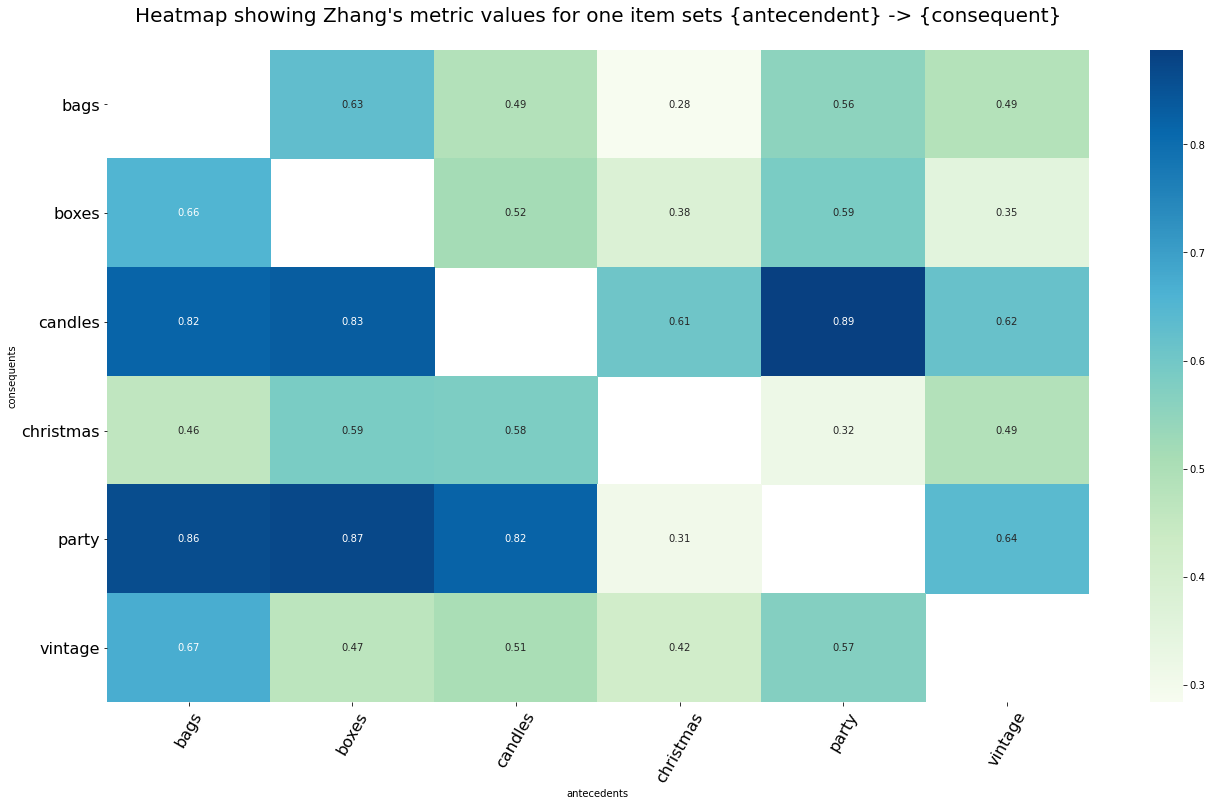

In [69]:
# Transform data to matrix format and generate heatmap
pivot = rules.pivot(index='consequents', columns='antecedents', values='zhang')
# sns.heatmap(pivot)

# Generate a heatmap with annotations on and the colorbar off
plt.figure(figsize=(22,12))
plt.title("Heatmap showing Zhang's metric values for one item sets {antecendent} -> {consequent}\n", size = 20)
sns.heatmap(pivot, annot = True, cbar = True, cmap='GnBu')

# Format and display plot
plt.yticks(rotation=0, size = 16)
plt.xticks(rotation=60, size = 16)
plt.show()

From the heatmap we can conclude that the best way to organize the classes we found is:

* `candles` can be close to `bags`, `boxes` and `party`
* `vintage` goes well with `bags`
* Although `Christmas` articles does not have so high Zhang's metric value it is still a positive value. Therefore, considering the highest values this section could be close to `boxes` and `candles` sections.


![](../images/classes_organization.PNG)

By applying multiple to the association rules and ordering by the highest to the lowest value of Zhang’s metrics we can complement and confirm the insights we have obtained by observing the heatmap.

In [70]:
filtered_rules = rules[(rules['antecedent support'] > 0.2) &
                           (rules['consequent support'] > 0.2) &
                           (rules['zhang'] > 0.5)]


In [71]:
filtered_rules_sorted = filtered_rules.sort_values('zhang')
filtered_rules_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
23,candles,vintage,0.217822,0.356436,0.128713,0.590909,1.657828,0.051073,1.573157,0.5073
11,candles,boxes,0.217822,0.514851,0.188119,0.863636,1.677448,0.075973,3.557756,0.5163
7,party,bags,0.277228,0.534653,0.247525,0.892857,1.669974,0.099304,4.343234,0.5551
29,party,vintage,0.277228,0.356436,0.168317,0.607143,1.703373,0.069503,1.638164,0.5713
18,candles,christmas,0.217822,0.247525,0.099010,0.454545,1.836364,0.045094,1.379538,0.5823
15,party,boxes,0.277228,0.514851,0.247525,0.892857,1.734203,0.104794,4.528053,0.5858
12,boxes,christmas,0.514851,0.247525,0.178218,0.346154,1.398462,0.050779,1.150844,0.5873
19,christmas,candles,0.247525,0.217822,0.099010,0.400000,1.836364,0.045094,1.303630,0.6053
22,vintage,candles,0.356436,0.217822,0.128713,0.361111,1.657828,0.051073,1.224279,0.6166
1,boxes,bags,0.514851,0.534653,0.396040,0.769231,1.438746,0.120772,2.016502,0.6286


# Conclusions

* `Market Basket Analysis (MBA)` is a powerful marketing tool that helps getting insights for product promotion and recommendations.

* A simple `transactional dataset` consisting of transaction ids (e.g., invoice numbers) and items of these transactions is enough to start your MBA.

* MBA helps identifying items frequently bought together and from there building recommendations based on this information (e.g., which bundles to offer, which items to present close to each other, how to improve inventory management, which items to upsell).

* MBA is based on the so called `association rules`. Association rules show us items that are associated with each other. The number of association rules grows very fast with the number of items.

* The `Apriori algorithm` is a fundamental tool to simplify MBA without eliminating useful association rules.

* A good knowledge of the `metrics` presented here is important so you can keep the association rules that are useful for your `business application`.

* Simple visualizations like `scatterplots`, `heatmap`, and `parallel coordinates plots` are great tools to guide the prunning process as well as to summarize final results.

* `Scatterplots` help visualizing the boundaries of values of metrics such support, helping identifying correct pruning thresholds. 

* Instead of inspecting the association rules table, we can make use of a `heatmap` and easily spot interesting association rules.
